In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
dt=pd.read_csv('/content/citrus.csv') 

In [ ]:
dt


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [ ]:
from pandas.core.common import standardize_mapping
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(dt.drop('name',axis=1))

StandardScaler()

In [ ]:
a=scalar.transform(dt.drop('name',axis=1))

In [ ]:
new_data=pd.DataFrame(a,columns=dt.columns[1:])
new_data

,diameter,weight,red,green,blue
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [ ]:
from sklearn.model_selection  import train_test_split
x=new_data#=dt.Class
y=dt['name']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state=30)
from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1407  117]
 [  96 1380]]
              precision    recall  f1-score   support

  grapefruit       0.94      0.92      0.93      1524
      orange       0.92      0.93      0.93      1476

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [ ]:
error_rate=[]
for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'error rate')

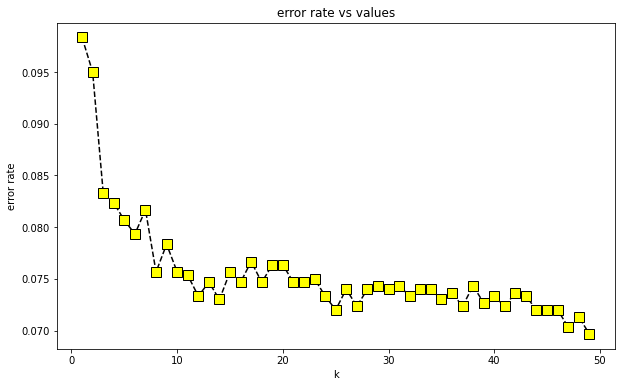

In [ ]:
plt.figure(figsize=(10,6)) 
plt.plot(range(1,50),error_rate,color='black',linestyle='dashed',marker='s',markerfacecolor='yellow',markersize=10)
plt.title('error rate vs values')
plt.xlabel('k')
plt.ylabel('error rate')